In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [3]:
# Загрузка данных
file_path = './Dresses_Attribute_Sales/Dress_Sales.csv'
df = pd.read_csv(file_path, header=None)

# Масштабирование признаков
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])  # Масштабируем все столбцы кроме последнего (целевой класс)

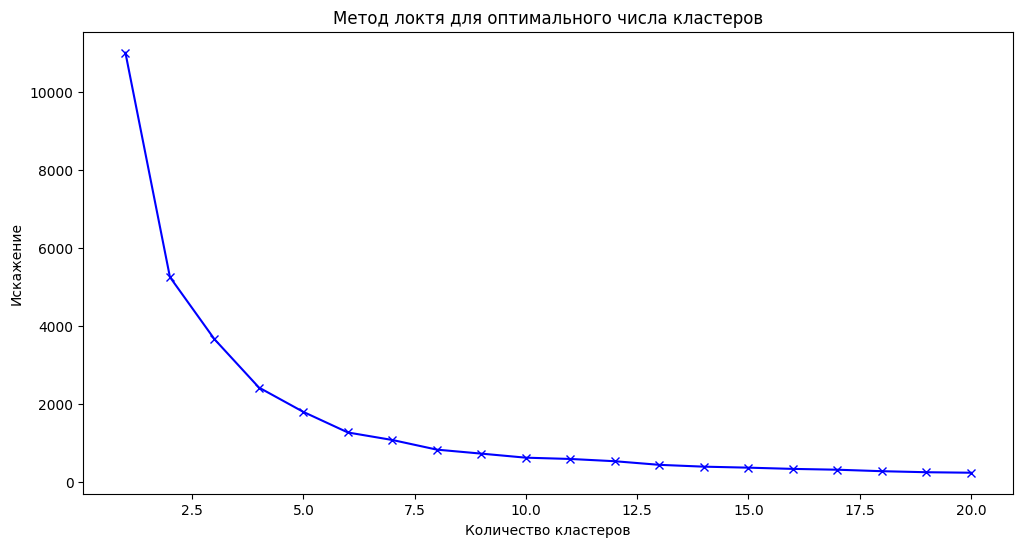

In [4]:
# Метод локтя для определения оптимального числа кластеров
def plot_elbow_method(scaled_features):
    distortions = []
    K = range(1, 21)
    for k in K:
        kmean_model = KMeans(n_clusters=k, random_state=42)
        kmean_model.fit(scaled_features)
        distortions.append(kmean_model.inertia_)

    plt.figure(figsize=(12, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Искажение')
    plt.title('Метод локтя для оптимального числа кластеров')
    plt.show()


plot_elbow_method(scaled_features)



KMeans:
  Silhouette Score = 0.5949


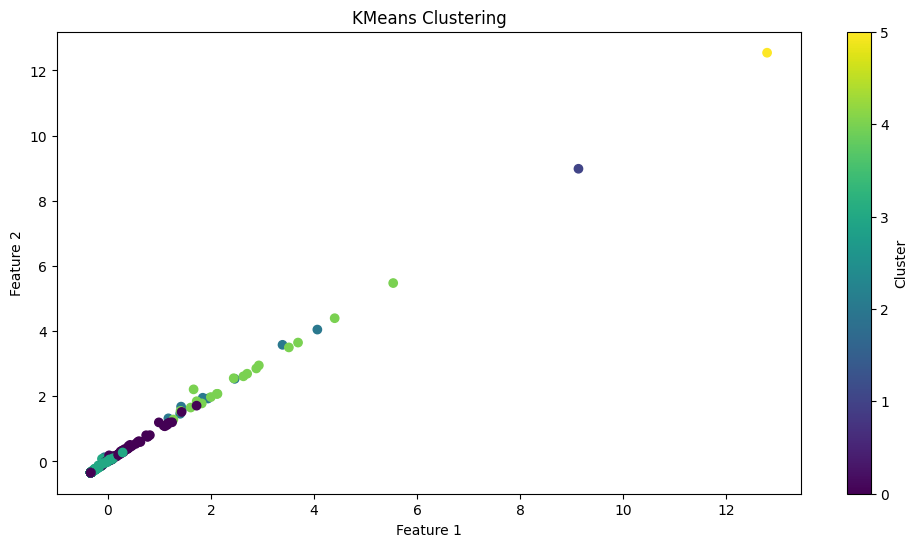

c:\Users\solda\VsCodeProjects\ML\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Affinity Propagation:
  Silhouette Score = 0.4003


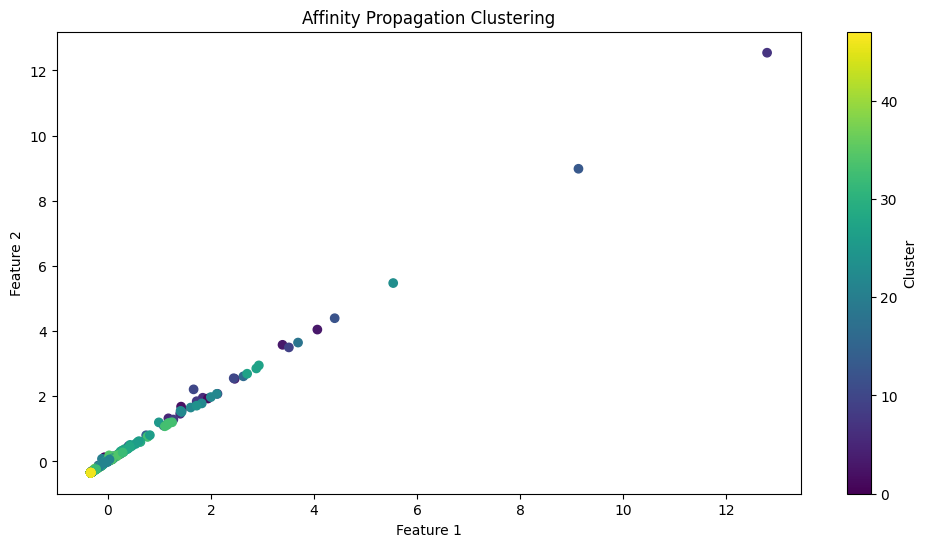

Mean Shift:
  Silhouette Score = 0.5987


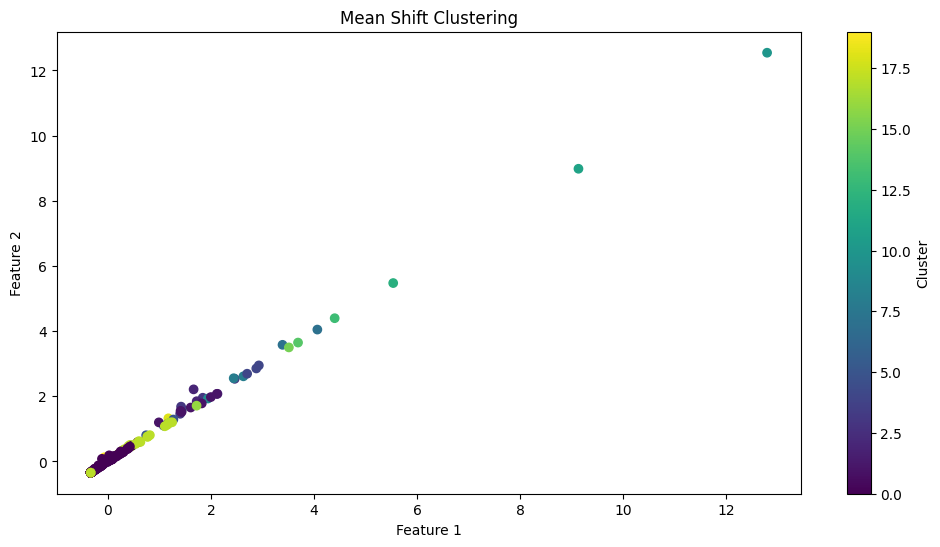

In [5]:

algorithms = {
    "KMeans": KMeans(n_clusters=6, random_state=42),  # Указываем 6 кластеров согласно методу локтя
    "Affinity Propagation": AffinityPropagation(),
    "Mean Shift": MeanShift() # метод сдвига среднего.
}
# Оценки (ответственность или доступность) можно рассчитать с помощью отрицательного квадратичного евклидова расстояния и записать 
# в виде матрицы сходства, где каждая строка и столбец соответствуют параметру, а каждая ячейка содержит сходство между двумя параметрами.


results = []

# Обучение и оценка алгоритмов
for name, algorithm in algorithms.items():
    model = algorithm.fit(scaled_features)
    labels = model.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)


    results.append((name, silhouette_avg))
    print(f"{name}:")
    print(f"  Silhouette Score = {silhouette_avg:.4f}") 
    plt.figure(figsize=(12, 6))
    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis')
    plt.title(f"{name} Clustering")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()



In [6]:
# Определение наилучшего алгоритма по silhouette score
best_algorithm = max(results, key=lambda x: x[1])
print(f"\nНаилучший алгоритм по Silhouette Score: {best_algorithm[0]} с Silhouette Score = {best_algorithm[1]:.4f}")


Наилучший алгоритм по Silhouette Score: Mean Shift с Silhouette Score = 0.5987
